# **DATA EXPLORATION, ANALYSIS AND PROCESSING: HEART DISEASE PREDICTION PROJECT**

This project aims to develop a Machine Learning algorithm to predict a person's tendency to develop some type of heart disease based on some reference clinical and laboratory factors.

The data was extracted from the Kaggle website:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/heart.csv',
                   sep=',', encoding='iso-8859-1')

Mounted at /content/drive


## **Data Exploration**

In [3]:
# First 5 rows in the dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Last 5 rows in the dataset
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
# Tuple of rows and columns
data.shape

(918, 12)

## **Variables Analysis (Attributes)**

In [6]:
# The frequency of each age — sorted by age frequency DESC
data['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
51,35
59,35
62,35


In [7]:
# Sorted by age ASC
data['Age'].value_counts().sort_index()

,count
Age,
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


In [8]:
histogram = px.histogram(data, x = "Age", nbins=60)
histogram.update_layout(width=800, height=500, title_text='Age Distribution')
histogram.show()

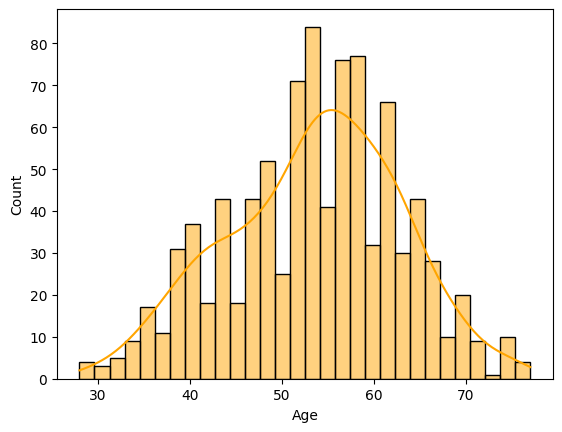

In [9]:
sns.histplot(data, x='Age', bins=30, color="orange", kde=True, stat="count");

### **Sex Attribute**

In [10]:
data['Sex'].value_counts()

,count
Sex,
M,725
F,193


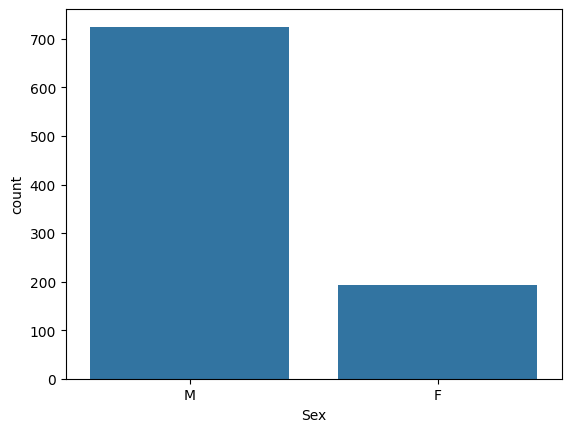

In [11]:
sns.countplot(x='Sex', data=data);

In [12]:
data['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


*   Asymptomatic (ASY): producing or showing no symptoms
*   Non anginal pain (NAP): a common symptom of many conditions, ranging from gastrointestinal problems to psychiatric conditions
*   Atypical angina (ATA): does not have associated classical symptoms of chest pain
*   Typical angina (TA): Typical angina is often described as pressure-like, heaviness, tightness, or squeezing








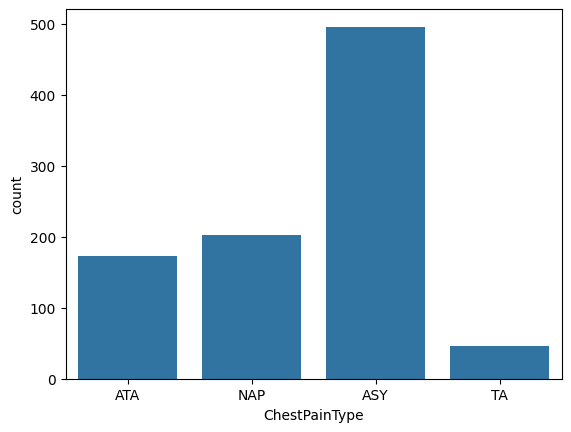

In [13]:
sns.countplot(x='ChestPainType', data=data);

### **Resting BP (blood pressure)**

In [14]:
data.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


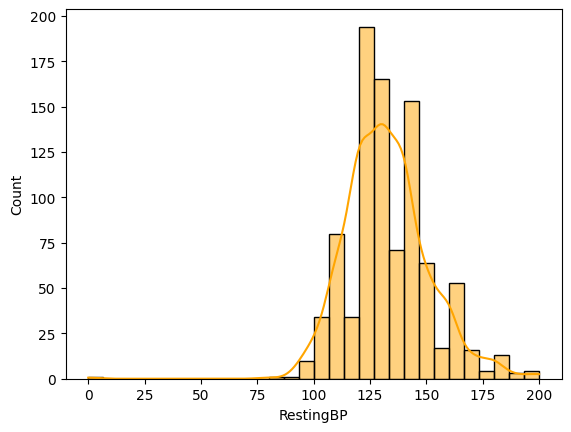

In [15]:
sns.histplot(data, x='RestingBP', bins=30, color="orange", kde=True, stat="count");

### **Cholesterol (mg/dl)**

In [16]:
data.Cholesterol.value_counts().sort_index()

,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


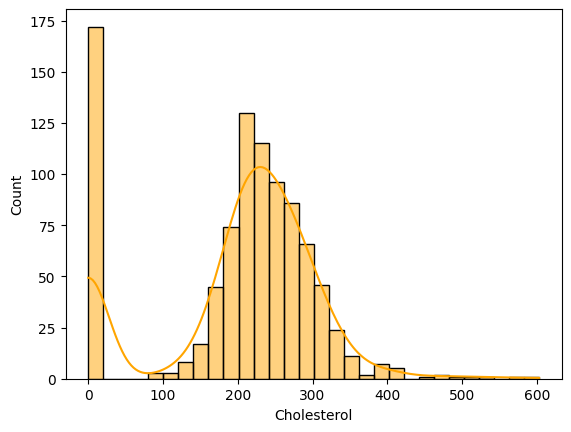

In [17]:
sns.histplot(data, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Fasting BS (blood sugar) (mg/dl)**

In [18]:
data.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


*   0: Fasting BS < 120 mg/dl (non-diabetes)
*   1: Fasting BS >= 120 mg/dl, (diabetes)

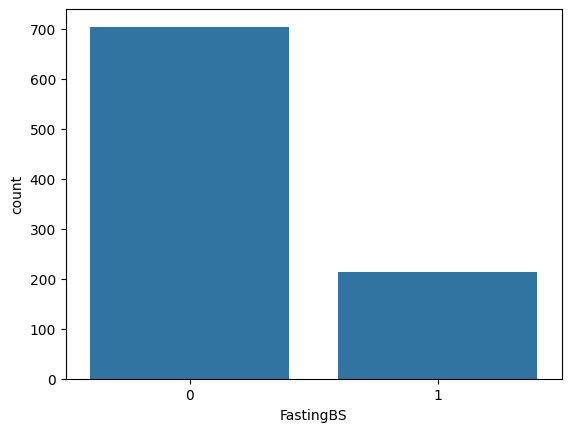

In [19]:
sns.countplot(x='FastingBS', data=data);

### **Resting ECG (electrocardiogram)**

In [20]:
data.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


*   Normal: Normal
*   LVH: Left Ventricular Hypertrophy
*   ST: ST segment

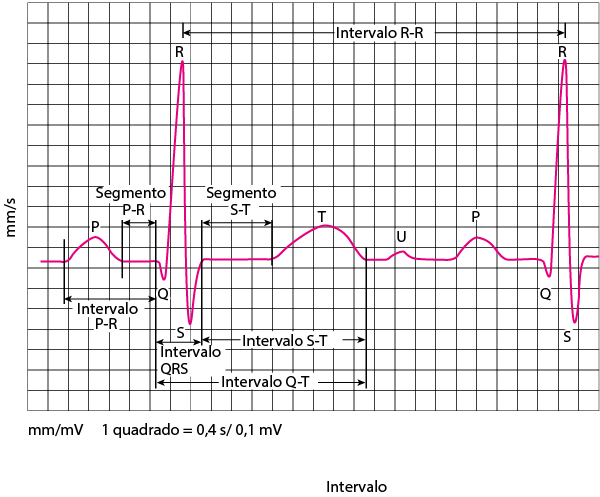

**ST Segment:** Any ST segment elevation, either upwards (elevation) or downwards (depression), should be evaluated as it may correspond to an acute myocardial infarction.

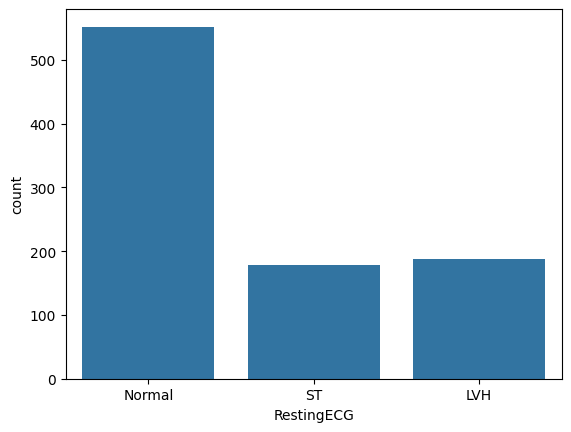

In [21]:
sns.countplot(x='RestingECG', data=data);

### **Max HR (heart rate)**

In [22]:
data['MaxHR'].value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
63,1
83,1
60,1


In [23]:
data['MaxHR'].value_counts().sort_index()

,count
MaxHR,
60,1
63,1
67,1
69,1
70,1
...,...
190,2
192,1
194,1


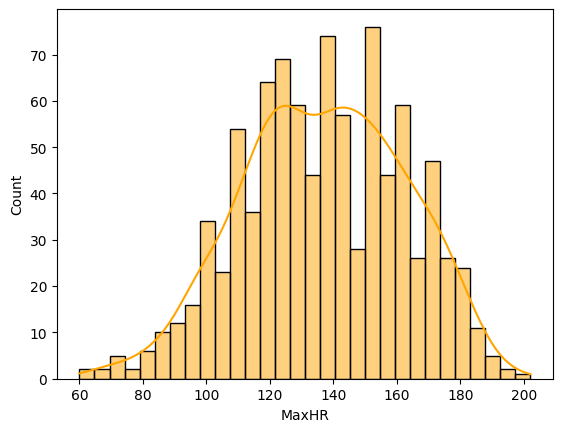

In [24]:
sns.histplot(data, x='MaxHR', bins=30, color="orange", kde=True, stat="count");

### **Exercise Angina**

In [25]:
data['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


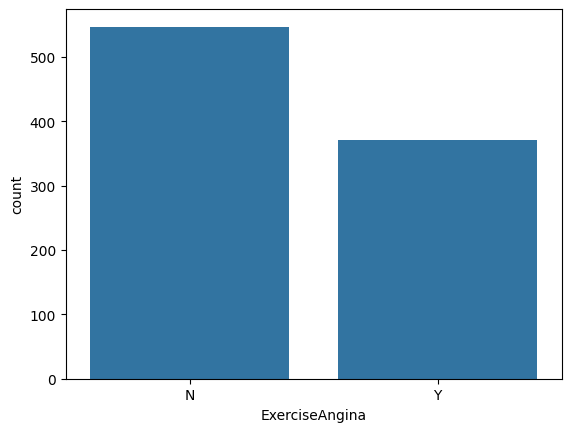

In [26]:
sns.countplot(x='ExerciseAngina', data=data);

### **Old Peak**

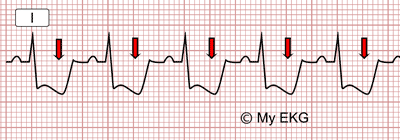

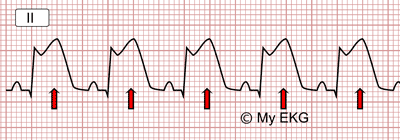

In [27]:
data['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


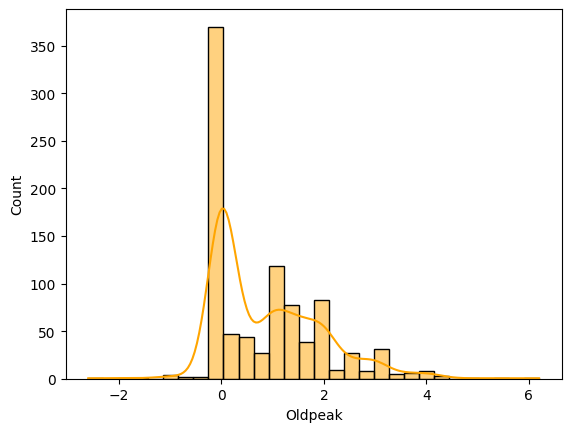

In [28]:
sns.histplot(data, x='Oldpeak', bins=30, color="orange", kde=True, stat="count");

### **ST_Slope**

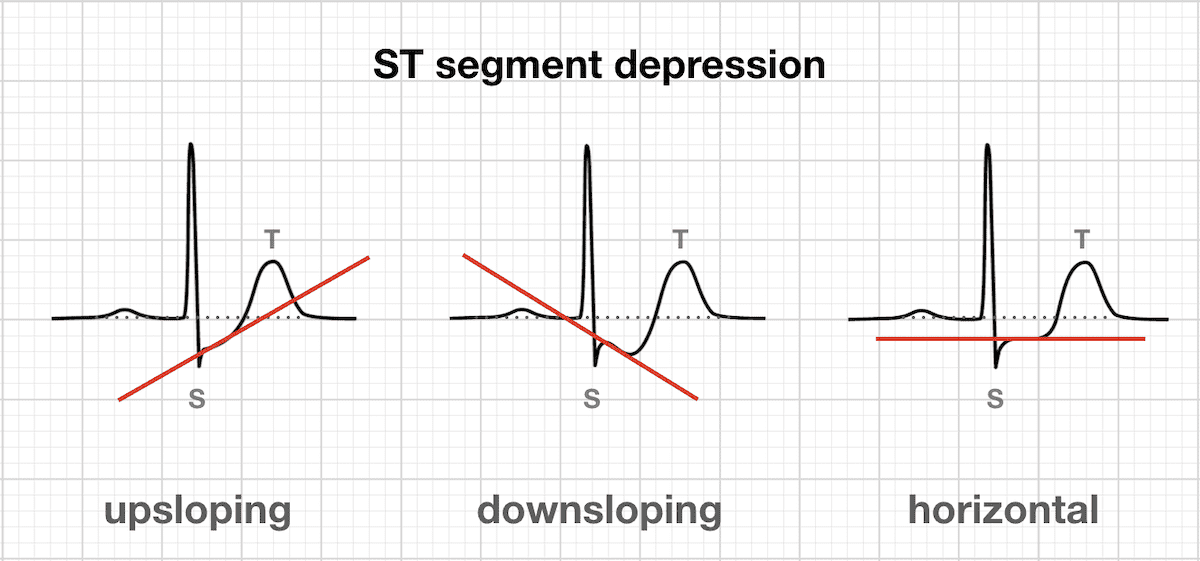

In [29]:
data['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


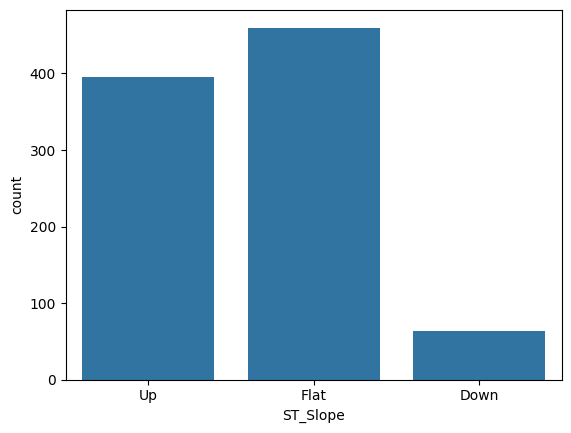

In [30]:
sns.countplot(x='ST_Slope', data=data);

### **Heart Disease**

In [31]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


*   0 = No heart disease
*   1 = heart disease



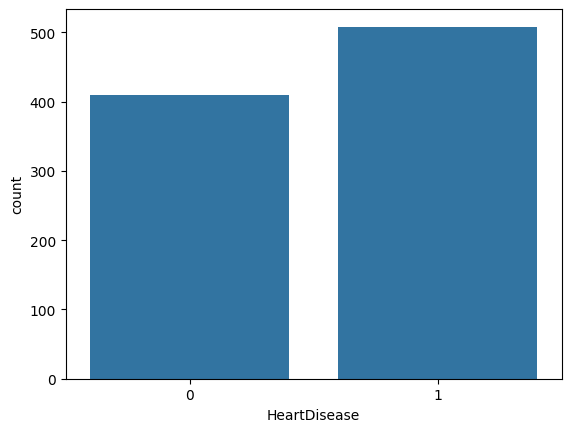

In [32]:
sns.countplot(x='HeartDisease', data=data);

## **Attributes types analysis**

In [33]:
# object: strings
# int64: integers
# float64: real numbers
# complex: complex numbers

# How to recognize the types from a dataset
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## **Missing Value (NAN)**

In [34]:
# Check if there's any variable with missing value
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [60]:
# Removing missing values (rows)
data2 = data.dropna()

In [61]:
data2.shape

(918, 12)

In [62]:
data2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [63]:
# Replace the missing values with the mean (inplace: updated the data2 dataset)
data2['Age'].fillna(data2['Age'].mean(), inplace=True)

In [65]:
# Replace the missing values with any other value
data2['Age'].fillna(10, inplace=True)

## **Descriptive Statistical Analysis**

In [64]:
# Generate descriptive statistics: the central tendency, dispersion and shape of a dataset's distribution
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [41]:
data.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Handling with Incoherent Values**

**Deleting record with zero pressure**

In [72]:
data2 = data.loc[data.RestingBP != 0]

In [43]:
data2.shape

(917, 12)

In [73]:
data2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Replacing zero Cholesterol values ​​with the mean without the zeros**

In [74]:
# 172 of the values are zero
data2.Cholesterol.value_counts()

,count
Cholesterol,
0,171
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


In [75]:
# This `mean` is considering all the zeros and influencing the final value
data2.Cholesterol.mean()

199.0163576881134

In [76]:
# Replace the zeros with NaN so it's considered in the mean calculation
data2.Cholesterol.replace(0, np.NaN, inplace=True)

<ipython-input-76-5ac27a09f770>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
data2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [78]:
data2.Cholesterol.mean()

244.6353887399464

In [49]:
# Replace missing values (NaN) with the average
data2['Cholesterol'].fillna(data2['Cholesterol'].mean(), inplace=True)

<ipython-input-49-5c237df7514f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
data2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [80]:
data2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,59.153524,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [81]:
data2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,254.0,0,Normal,150,N,0.0,Flat,1


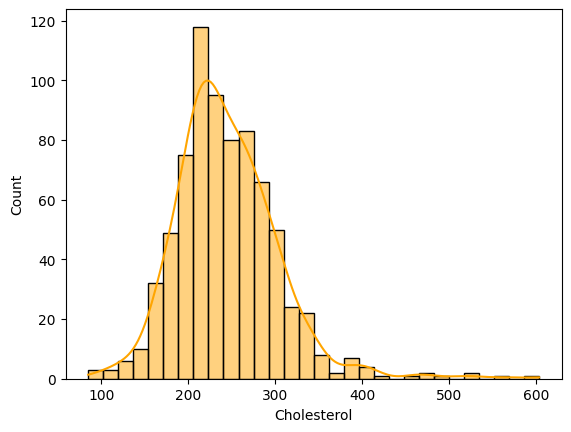

In [82]:
sns.histplot(data2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Outliers Analysis**

In [54]:
px.box(data2, y='Age')

In [55]:
# Resting Blood Pressure
px.box(data2, y='RestingBP')

In [56]:
px.box(data2, y='Cholesterol')

In [57]:
# Maximum Heart Rate
px.box(data2, y='MaxHR')

## **Saving (Exporting) the treated dataset**

In [83]:
data2.to_csv('pre_processed_heart_disease_dataset.csv', sep=';', encoding='utf-8', index = False)